In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from functions import *
import os
import csv

In [ ]:
#bulk process

edf_files = [f for f in os.listdir('.') if f.endswith('.edf') and not f.startswith('._')]
output_filename = "test.csv"
Q, angle, _, _ = load_Qmaps("qmap_output.npz")
mask, _, _, mesh_q, mesh_theta, _, qmin, qmax = load_qtheta_mask("mask.npz")

# Open CSV file for writing
with open(output_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header
    header = ['filename', 'P2', 'P4'] + [f'param_{i}' for i in range(6)]
    writer.writerow(header)
    
    # Loop through files and save data
    for filename in edf_files:
        try:
            P2, P4, params = procedure(filename, Q, angle, mask, mesh_q, mesh_theta, qmin, qmax, flag_plot = False)
            row = [filename, P2, P4] + list(params)
            writer.writerow(row)
            print(f"Processed: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

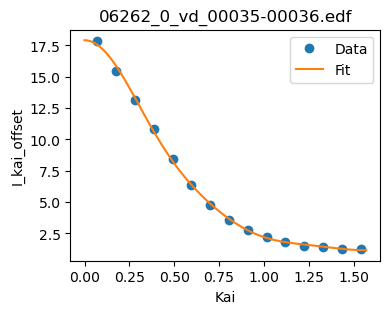

(0.5828952531405152,
 0.3239949617898876,
 array([   1.16358825,   13.40709496,  -99.54949496,  429.26416314,
        -626.94941288,  344.04927632]))

In [23]:
#single file

filename = '06262_0_vd_00035-00036.edf'

Q, angle, _, _ = load_Qmaps("qmap_output.npz")
mask, _, _, mesh_q, mesh_theta, _, qmin, qmax = load_qtheta_mask("mask.npz")

procedure(filename, Q, angle, mask, mesh_q, mesh_theta, qmin, qmax, flag_plot = True)